In [40]:
import pandas as pd
df_ink = pd.read_csv('../../../data/round1/round1_ink.csv', index_col=0)

In [41]:
df_ink2 = df_ink[df_ink['day'] == -2 ]
df_ink1 = df_ink[df_ink['day'] == -1 ]
df_ink0 = df_ink[df_ink['day'] == 0 ]

df_ink0.set_index('timestamp', inplace=True)
df_ink1.set_index('timestamp', inplace=True)
df_ink2.set_index('timestamp', inplace=True)

In [42]:
feature_cols = [col for col in df_ink.columns if col not in ['day', 'timestamp', 'product', 'profit_and_loss', 'log_return5']]

In [49]:
feature_cols

['bid_price_1',
 'bid_volume_1',
 'bid_price_2',
 'bid_volume_2',
 'bid_price_3',
 'bid_volume_3',
 'ask_price_1',
 'ask_volume_1',
 'ask_price_2',
 'ask_volume_2',
 'ask_price_3',
 'ask_volume_3',
 'mid_price',
 'best_bid',
 'best_ask',
 'spread',
 'vwap',
 'orderbook_imbalance',
 'ask_volume',
 'bid_volume',
 'ask_bid_ratio',
 'log_return_5',
 'log_return_1',
 'vol_10',
 'kurt_50',
 'mid_mean_20',
 'mid_reversion_gap',
 'depth_ratio',
 'relative_spread',
 'imbalance_diff',
 'vol_diff',
 'spread_change',
 'return_vol_ratio',
 'alpha1',
 'alpha2',
 'alpha3',
 'alpha4',
 'alpha5',
 'log_return',
 'target']

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_factor_time_series(df, factor, product=None):
    plt.figure(figsize=(12, 4))
    data = df[df['product'] == product] if product else df
    plt.plot(data['timestamp'], data[factor], label=factor)
    plt.title(f"{factor} over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_factor_rolling_stats(df, factor, window=50):
    data = df[[factor]].copy()
    data['mean'] = data[factor].rolling(window).mean()
    data['std'] = data[factor].rolling(window).std()
    data['skew'] = data[factor].rolling(window).skew()
    data['kurt'] = data[factor].rolling(window).kurt()

    fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    axs[0].plot(data[factor], label='Raw'); axs[0].plot(data['mean'], label='Mean'); axs[0].legend()
    axs[1].plot(data['std'], label='Std'); axs[1].legend()
    axs[2].plot(data['skew'], label='Skew'); axs[2].legend()
    axs[3].plot(data['kurt'], label='Kurtosis'); axs[3].legend()
    plt.suptitle(f"{factor} - Rolling Stats (window={window})")
    plt.tight_layout()
    plt.show()

def plot_factor_vs_target_box(df, factor, target_col='target'):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[target_col], y=df[factor])
    plt.title(f"{factor} distribution by target")
    plt.xlabel("Target Class")
    plt.ylabel(factor)
    plt.tight_layout()
    plt.show()

def plot_factor_intraday_pattern(df, factor, bins=20):
    df = df.copy()
    df['minute'] = df['timestamp'] % 100000
    df['minute_bin'] = pd.qcut(df['minute'], bins, duplicates='drop')
    grouped = df.groupby('minute_bin')[factor].mean()
    grouped.plot(kind='bar', figsize=(12, 4), title=f"Intraday Mean of {factor}")
    plt.ylabel("Mean")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

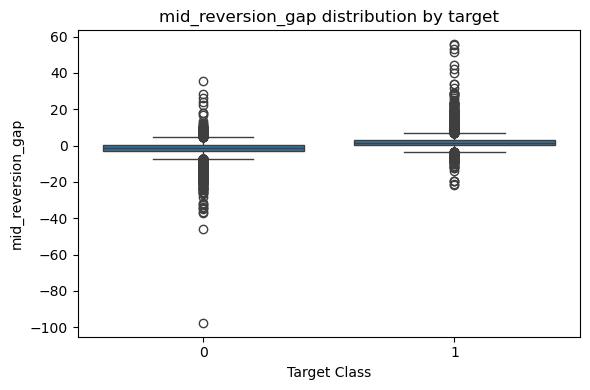

In [50]:
plot_factor_vs_target_box(df_ink, factor = 'mid_reversion_gap', target_col='target')

In [30]:
def z_score_norm(df, cols):
    df = df.copy()
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = (df[col] - mean) / std
    return df

In [31]:
df_ink0 = z_score_norm(df_ink0, feature_cols)

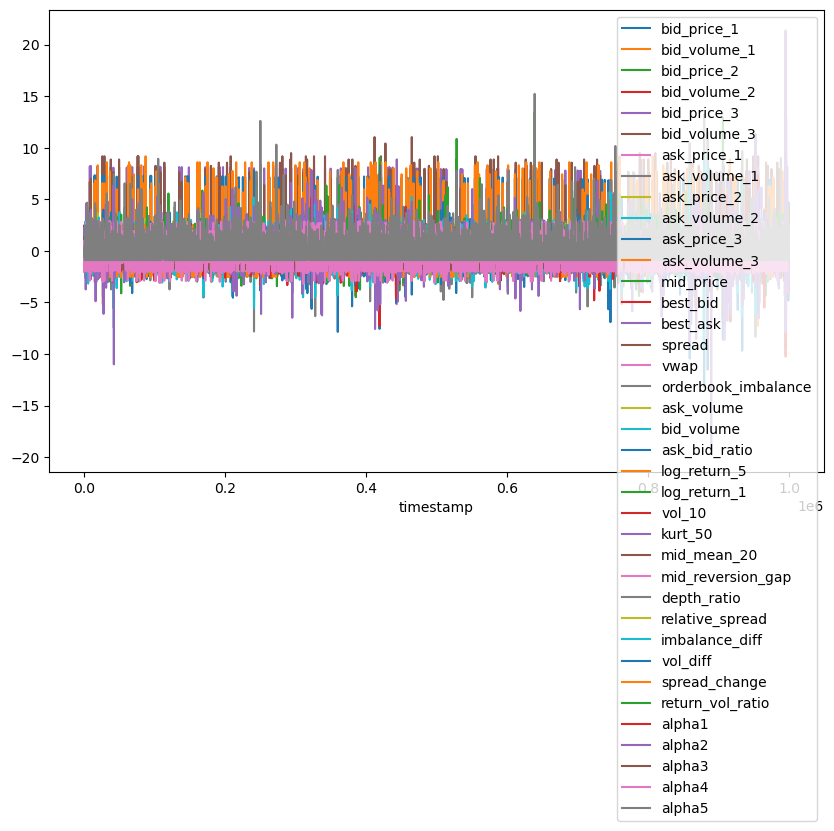

In [34]:
#画出各个feature随timestamp的变化

import matplotlib.pyplot as plt
import seaborn as sns

df_ink0[feature_cols].plot(figsize=(10,6))
plt.show()



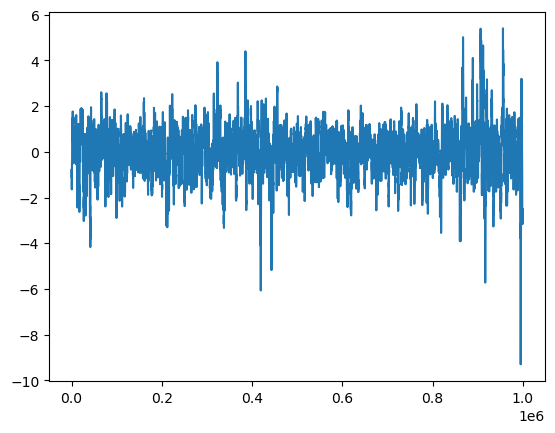

In [35]:
plt.plot(df_ink0['mid_reversion_gap'])
plt.show()